# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Cointegration vs. Correlation

Correlation and cointegration, while used interchangeably by most of us, in reality, are not the same. To demonstrate this, in this notebook, we will show two price series that are cointegrated, but not correlated, and vice versa. In the below cell, we create a function called cointegration_test which will determine if the two price series are cointegrated or not using the ADF test.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels

# To plot the graphs
import matplotlib.pyplot as plt
import seaborn

# For cointegration check
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts

# Function to check for cointegration at 90% confidence level using augmented dickey-fuller test
def cointegration_test(x, y):
    result = stat.OLS(x, y).fit()
    adf_results = ts.adfuller(result.resid)    
    if adf_results[0] <= adf_results[4]['10%']:
        return 'Pair is cointegrated'
    else:
        return 'Pair is not cointegrated'

## Cointegration

We can create a portfolio of two stocks such that the difference (or spread) between the price series of two instruments is stationary. Then, the two stocks are said to be cointegrated with each other. A price series is called stationary if it doesn’t move much but stays around the mean. 

## Correlation

Correlation is used to identify the strength as well as the magnitude of the relationship between two variables. Its value ranges from -1 to 1. The value of +1 means there exists a perfect positive correlation between the two variables, -1 means there is a perfect negative correlation and 0 means there is no correlation. A perfect positive correlation is when one variable move in either up or down direction, the other variable also moves in the same direction with the same magnitude while a perfect negative correlation is when one variable move in the upward direction, the other variable moves in the downward (i.e. opposite) direction with the same magnitude.


# Cointegration without Correlation

We define two price series X and Y such that they are cointegrated but not correlated. 

The price series X is generated using np.random.normal function with a mean equal to 30, standard deviation of 1, and number of samples equal to 100. The price series Y is generated as a square wave oscillating between 10 and 50.


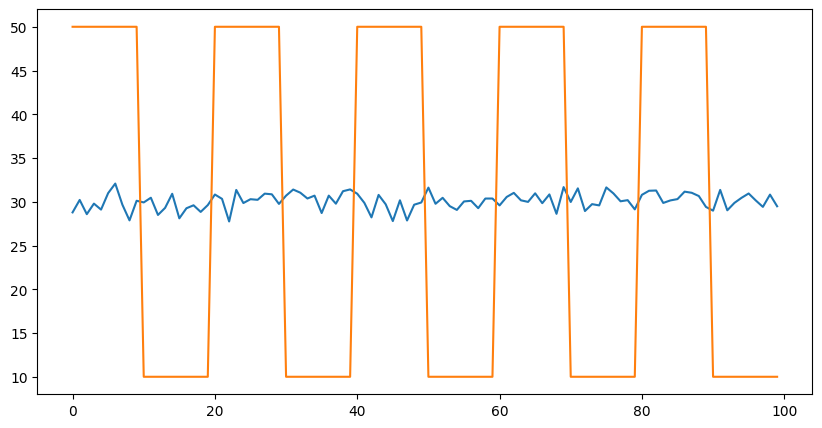

In [2]:
# Generated from a normal distribution
X = pd.Series(np.random.normal(30, 1, 100), name='X')

# Square wave
Y = pd.Series(index=X.index, name = 'Y')

for i in range(0,len(Y),20):
    Y[i:i+10] = 50
    Y[i+10:i+20] = 10

# Plot the price series X and Y
plt.figure(figsize=(10,5))
X.plot()
Y.plot()
plt.show()

## Spread Between Price Series X and Y

Now, we subtract both the price series to create a spread and then plot it.

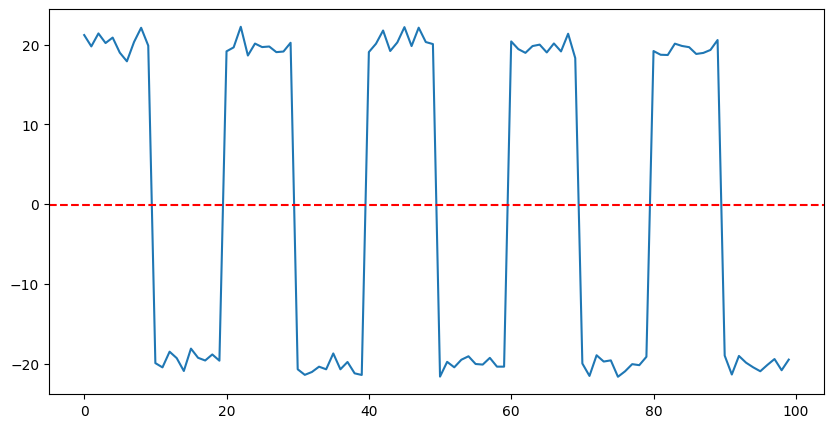

In [3]:
plt.figure(figsize=(10,5))
(Y-X).plot() # Plot the spread
plt.axhline((Y-X).mean(), color='red', linestyle='--')
plt.show()

As seen from the graph, the spread between price series X and Y oscillates around the mean line (red dotted line). Hence, visually we can confirm that the price series X and Y are cointegrated.

## Statistical Check for Cointegration and Correlation

In [4]:
print ('Cointegration test:', cointegration_test(X,Y))
print ('Correlation: ', Y.corr(X))

Cointegration test: Pair is cointegrated
Correlation:  0.0009163967346735569


Here, we can observe that the correlation is very low but the pair is cointegrated.
<BR>

# Correlation without Cointegration

We define two price series X and Y such that X and Y are correlated but not cointegrated. 

The price series X starts with 10 and increases by two points every day and some random noise is added to it. Similarly, the price series Y starts with 10 and increases by 3 points every day and some random noise is added to it.


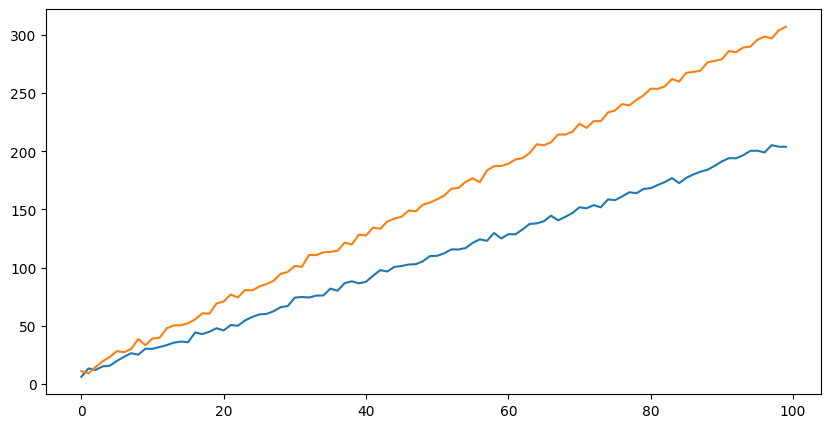

In [5]:
# Initialize X and Y
X[0] = 10
Y[0] = 10

# Add 2 points to X and 3 points to Y everyday
for i in range(1,len(X)):
    X[i] = X[i-1] + 2
    Y[i] = Y[i-1] + 3

# Add some random noise to X and Y
some_noise = pd.Series(np.random.normal(0, 2, 100))
X = X + some_noise
some_noise = pd.Series(np.random.normal(0, 2, 100))
Y = Y + some_noise

# Plot the price series X and Y
plt.figure(figsize=(10,5))
X.plot()
Y.plot()
plt.show()

## Spread Between Price Series X and Y


Now, we subtract both the price series to create a spread and then plot it.

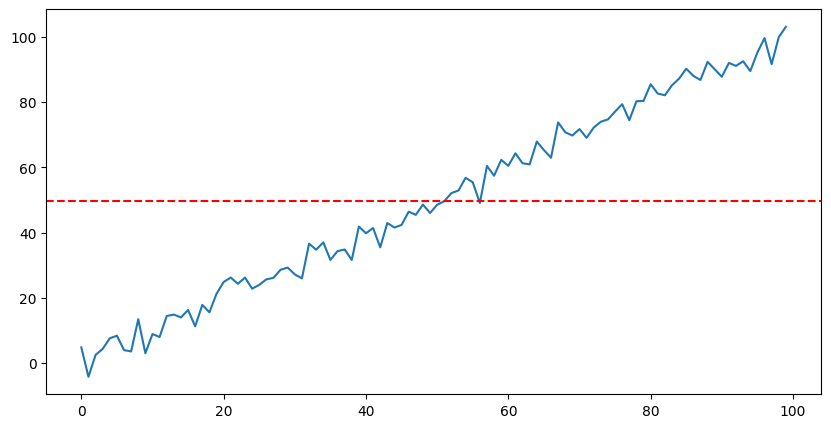

In [6]:
# Plot the spread
plt.figure(figsize=(10,5))
(Y-X).plot() 
plt.axhline((Y-X).mean(), color='red', linestyle='--')
plt.show()

Notice, the spread between price series X and Y is increasing. Hence, visually we can confirm the price series X and Y are not cointegrated.

## Statistical Check for Cointegration and Correlation

In [7]:
print ('Cointegration test:', cointegration_test(X,Y))
print ('Correlation: ', Y.corr(X))

Cointegration test: Pair is not cointegrated
Correlation:  0.9990865314204627


The correlation is incredibly high, but the pair is not cointegrated. 

In the next unit, there will be a quiz on Cointegration vs. Correlation.
<BR><BR>